<h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">INFO 212: Data Science Programming I</h2>
<h3 style = "text-align:center">Assignment 4</h3>
<div style="text-align:center; border-style:solid; padding: 10px">
<div style="font-weight:bold">Due Date: Sunday, May 27, 2018</div>
This assignment counts for 15% of the final grade
</div>

<h3 style="color:red; font-weight:bold; text-decoration: underline">DON'T FORGET TO PUT YOUR NAME BELOW</h3>

### NAME: Linh Mai


### A. Assignment Overview
This assignment provides the opportunity for you to practice with the capabilities of data wrangling in Python. 

### B. What to Hand In
	
Sumbit a completed this Jupyter notebook. 

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation. Text font size should be either 11 or 12 points.

### F. Marking Schemes:

Marking assignments will be based on several aspects: presentation, correctness and coding styles. 

For programming questions, 10% of the mark will be judged on the coding style. 

The following is a set of guidelines for the coding style in this course:
1. Write a good comment for each variable, each method, each control branch, and each loop.
2. Use appropriate indentations to indicate control flows and blocks of code. 
3. Your method comments must mention the purpose of each parameter, and must be grammatically correct. 
4. Each line must be less than 80 characters long including tabs and spaces. 
5. Put a blank space before and after every operator. 
6. When breaking up a long line, break it before an operator, not after. 

### G. Data Sets

This assignment needs the data sets specified in the questions.

### H. Answer the following questions

## Question 1:

Download the dataset: `loan-applications.csv` and load it into a data frame. The data set contains several hundreds of loan application data. This data set provides a glimse of what bank and insurance companies facing during their data analyses. The goal is to automate the loan application process based on applicants' information. This data set contains many features of applicants, including: Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. The main problem is that the data set contains missing values and different types of data. Here, you are asked to write code to clean and visualize the data and answer the following questions:
- List the number of missing values for each column.
- Remove the applications each of which has more than 2 missing values.
- Forward fill up the missing values for columns with Object data type.
- Fill up the missing values with their means for columns with numerical data types.
- After the above steps, show that there are no missing data in the DataFrame.
- Plot the relationship between Education and ApplicantIncome.
- Plot the relationship between Property_Area and Loan_Status.
- Categorize the ApplicantIncome into low (0-2000), medium (2000-20000), High(20000-50000), and Rich(>50000).
- Plot the relationship between Loan_Status and the categories of ApplicantIncome.
- Categorize the CoapplicantIncome into low (0-2000), medium (2000-10000), High(10000-20000), and Rich(>20000).
- Plot the relationship between Loan_Status and the categories of CoapplicantIncome. 
- Develop plots to show the relationships between Load_Status and Education, Married, Credit_History. 
- For all the columns with no-numerical data (except for Loan_ID), convert the values to numerical categorical representations.

In [2]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
%matplotlib inline

In [3]:
# Write your code below
loan_df = pd.read_csv("datasets/loan-applications.csv")
column_null = loan_df.isnull().sum()
column_null

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
drop_na_rows = loan_df.dropna(thresh = 11)
drop_na_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              612 non-null object
Gender               599 non-null object
Married              610 non-null object
Dependents           598 non-null object
Education            612 non-null object
Self_Employed        581 non-null object
ApplicantIncome      612 non-null int64
CoapplicantIncome    612 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     598 non-null float64
Credit_History       563 non-null float64
Property_Area        612 non-null object
Loan_Status          612 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 66.9+ KB


In [6]:
object_cols = ['Dependents','Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
drop_na_rows.update(drop_na_rows[object_cols].fillna(method = 'ffill', axis =0))
drop_na_rows.iloc[228]

C:\Users\kpos7\Anaconda3\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


Loan_ID              LP001761
Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed             Yes
ApplicantIncome          6400
CoapplicantIncome           0
LoanAmount                200
Loan_Amount_Term          360
Credit_History              1
Property_Area           Rural
Loan_Status                 Y
Name: 229, dtype: object

In [7]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
drop_na_rows.update(drop_na_rows[num_cols].fillna(drop_na_rows[num_cols].mean()))
drop_na_rows.head(20)

C:\Users\kpos7\Anaconda3\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.000000,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.000000,1.000000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.000000,1.000000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.000000,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.000000,1.000000,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.000000,1.000000,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.000000,1.000000,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.000000,0.000000,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.000000,1.000000,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.000000,1.000000,Semiurban,N


In [8]:
drop_na_rows.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Text(0.5,1,"Education vs applicant's income")

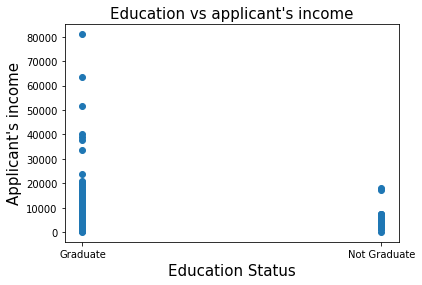

In [16]:
plt.scatter(drop_na_rows['Education'], drop_na_rows['ApplicantIncome'])
plt.xlabel('Education Status', fontsize = 15)
plt.ylabel("Applicant's income", fontsize =15)
plt.title("Education vs applicant's income", fontsize =15)


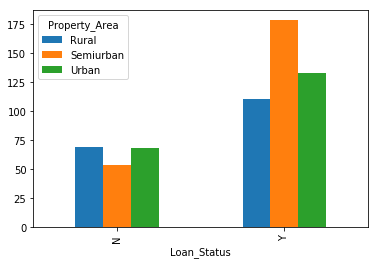

In [71]:
new = drop_na_rows[['Loan_Status','Property_Area']].copy()
grouped = new.groupby(['Loan_Status','Property_Area'])
grouped.size().unstack(fill_value=0).plot.bar()

In [92]:
bins = [0,2000,20000,50000,10000000]
groups_name = ['low','medium','high','rich']
drop_na_rows['IncomeGroup'] = pd.cut(drop_na_rows['CoapplicantIncome'], bins, include_lowest = True, labels = groups_name)


C:\Users\kpos7\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


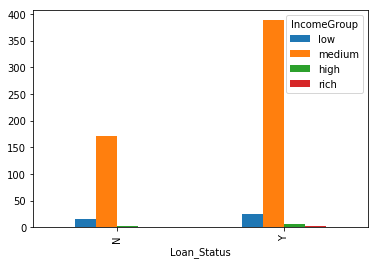

In [97]:
new = drop_na_rows[['Loan_Status','IncomeGroup']].copy()
grouped1 = new.groupby(['Loan_Status','IncomeGroup'])
grouped1.size().unstack(fill_value=0).plot.bar()

In [106]:
co_bins = [0,2000,10000,20000,10000000]
drop_na_rows['CoIncomeGroup'] = pd.cut(drop_na_rows['CoapplicantIncome'], co_bins, include_lowest = True, labels = groups_name)

C:\Users\kpos7\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


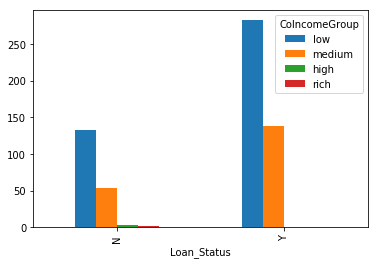

In [107]:
new = drop_na_rows[['Loan_Status','CoIncomeGroup']].copy()
grouped2 = new.groupby(['Loan_Status','CoIncomeGroup'])
grouped2.size().unstack(fill_value=0).plot.bar()

In [50]:
import seaborn as sns

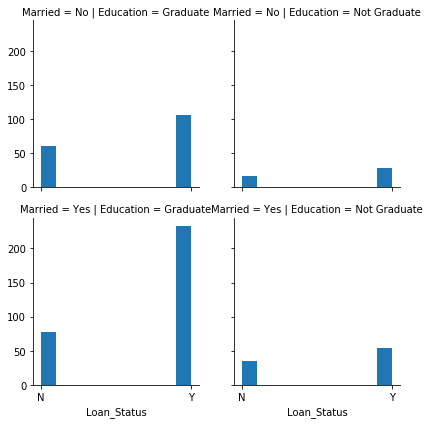

In [53]:
g = sns.FacetGrid(drop_na_rows, col = 'Education', row = 'Married')
g = g.map(plt.hist, "Loan_Status")

In [112]:
drop_na_rows['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [114]:
drop_na_rows['Gender'].replace({'Male' : 0, 'Female' : 1}, inplace = True)

C:\Users\kpos7\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [119]:
drop_na_rows['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [120]:
drop_na_rows['Married'].replace({'No' : 0, 'Yes' : 1}, inplace = True)

C:\Users\kpos7\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [121]:
drop_na_rows['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [122]:
drop_na_rows['Dependents'].replace({'0':0, '1' : 1, '2' : 2, '3+' : 3}, inplace = True)

C:\Users\kpos7\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [125]:
drop_na_rows['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [130]:
drop_na_rows['Education'].replace({'Not Graduate' : 0, 'Graduate' : 1}, inplace = True)

C:\Users\kpos7\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [133]:
drop_na_rows['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [134]:
drop_na_rows['Self_Employed'].replace({'No' : 0, 'Yes' : 1}, inplace = True)

C:\Users\kpos7\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [136]:
drop_na_rows['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [137]:
drop_na_rows['Property_Area'].replace({'Urban' : 1, 'Rural' : 2, 'Semiurban' : 3}, inplace = True)

C:\Users\kpos7\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [139]:
drop_na_rows['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [140]:
drop_na_rows['Loan_Status'].replace({'N' : 0, 'Y' : 1}, inplace = True)

C:\Users\kpos7\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [141]:
drop_na_rows.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,IncomeGroup,CoIncomeGroup
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.000000,1,1,medium,low
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.000000,2,0,medium,low
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.000000,1,1,medium,low
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.000000,1,1,medium,medium
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.000000,1,1,medium,low
5,LP001011,0,1,2,1,1,5417,4196.0,267.000000,360.0,1.000000,1,1,medium,medium
6,LP001013,0,1,0,0,0,2333,1516.0,95.000000,360.0,1.000000,1,1,medium,low
7,LP001014,0,1,3,1,0,3036,2504.0,158.000000,360.0,0.000000,3,0,medium,medium
8,LP001018,0,1,2,1,0,4006,1526.0,168.000000,360.0,1.000000,1,1,medium,low
9,LP001020,0,1,1,1,0,12841,10968.0,349.000000,360.0,1.000000,3,0,medium,high


#### Question 2:
Download the data set `imdb_1000.csv` and load it into a data frame. This data set contains rating information for about one thousand of movies. The following columns appear in the data set: star_rating, title, content_rating, genre, duration, and actors_list. Write code to clean and wrangle the data as instructed below:
- The actors_list column contains strings each of which should have three actor names. Extract the three actor names and add three new columns: actor_1, actor_2, actor_3 in the data set. After the extraction, remove the column actors_list.

**Note**: Your solution must be different from the kernel at: [https://www.kaggle.com/pkabir/imdb-movies-text-data-cleaning](https://www.kaggle.com/pkabir/imdb-movies-text-data-cleaning)

In [29]:
# Write your code below
